# Convolutional Neural Networks and Computer Vision

In [184]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

<img src="https://miro.medium.com/max/945/1*GPBRUVqDhQxDuW8r6X5n7g.png" /><br>
more source <a href="https://www.youtube.com/watch?v=uapdILWYTzE">MIT 6.S191: Convolutional Neural Networks</a>

<img src="https://i.stack.imgur.com/0rs9l.gif" /><br>
- Padding 'valid' is the first figure. The filter window stays inside the image.

- Padding 'same' is the third figure. The output is the same size.

<img src="https://blog.roboflow.com/content/images/2020/07/grayscale_aug.gif" width=800px/>

## Preprocessing images

In [270]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (and scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir_path = 'pizza_steak'
train_dir = os.path.join(dir_path,'train')
test_dir = os.path.join(dir_path,'test')

#import data and turn to batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Create model

In [271]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(filters= 10,kernel_size= (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),

    tf.keras.layers.Conv2D(filters= 10,kernel_size= (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

history_1 = model_1.fit(train_data, epochs=3, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/3
47/47 [==============================] - 18s 379ms/step - loss: 0.5952 - accuracy: 0.6887 - val_loss: 0.5075 - val_accuracy: 0.7480
Epoch 2/3
47/47 [==============================] - 18s 377ms/step - loss: 0.4758 - accuracy: 0.7840 - val_loss: 0.3821 - val_accuracy: 0.8440
Epoch 3/3
47/47 [==============================] - 18s 384ms/step - loss: 0.4481 - accuracy: 0.7880 - val_loss: 0.3506 - val_accuracy: 0.8520


> **steps_per_epoch** is batches of samples to train. It is used to define how many batches of samples to use in one epoch.

In [272]:
history_1.history

{'loss': [0.5951759219169617, 0.4758181571960449, 0.4480578601360321],
 'accuracy': [0.6886666417121887, 0.7839999794960022, 0.7879999876022339],
 'val_loss': [0.5074736475944519, 0.38210028409957886, 0.35057833790779114],
 'val_accuracy': [0.7480000257492065, 0.843999981880188, 0.8519999980926514]}

In [273]:
len(train_data) , 1500/32

(47, 46.875)

In [274]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 113ms/step - loss: 0.3506 - accuracy: 0.8520


[0.35057833790779114, 0.8519999980926514]

In [275]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 10)     

## Visualizing the layer in a CNN

In [276]:
from tensorflow.keras.models import Sequential
import cv2

image_path = 'pizza_steak/train/pizza/259449.jpg'
def get_image_tensor(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
visual_cnn = Sequential(model_1.layers[:5])

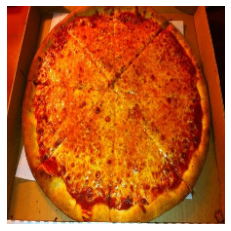

In [277]:
image = get_image_tensor(image_path)
plt.imshow(image)
plt.axis('off');

In [278]:
yhat = visual_cnn.predict(image.reshape(1,224,224,3))
yhat = yhat.reshape(visual_cnn.output_shape[1:])

def visual_layer(data):
    n = data.shape[-1] # number of layer images
    plt.figure(figsize=(n*2,n*2))

    index = 0
    for layer_image in range(n) :
        plt.subplot(n-5,5,index+1)
        plt.imshow(data[:,:,index], cmap=plt.cm.get_cmap('jet'))
        plt.axis('off')
        index+=1

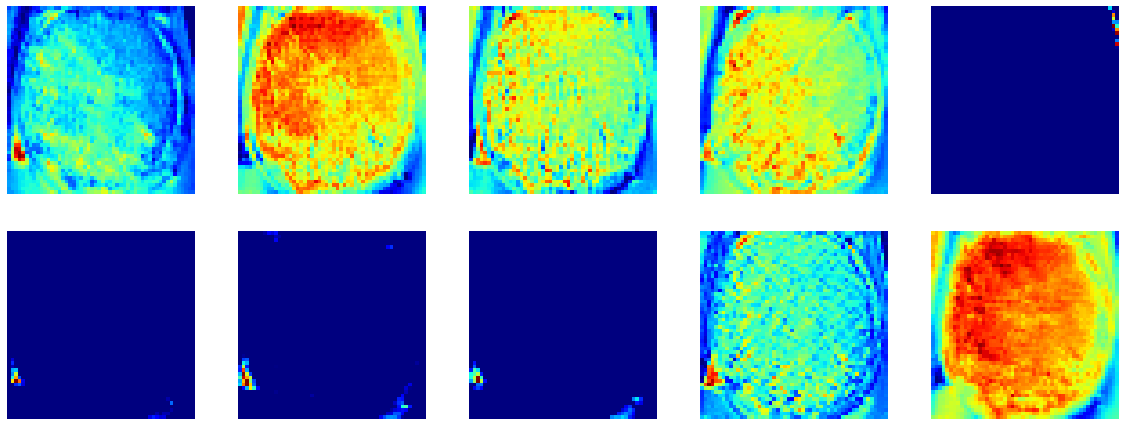

In [279]:
visual_layer(yhat)

## Predictions

In [280]:
predict_proba = model_1.predict(valid_data)
predict_proba[:5]

array([[0.29137367],
       [0.42526892],
       [0.9856464 ],
       [0.20365539],
       [0.33800793]], dtype=float32)

In [281]:
predictions = np.round(predict_proba).reshape(-1,).astype(int)
predictions[:5]

array([0, 0, 1, 0, 0])

In [282]:
class_name = list(valid_data.class_indices.keys())
class_name

['pizza', 'steak']

In [348]:
images, labels = valid_data.next()
len(images)

32

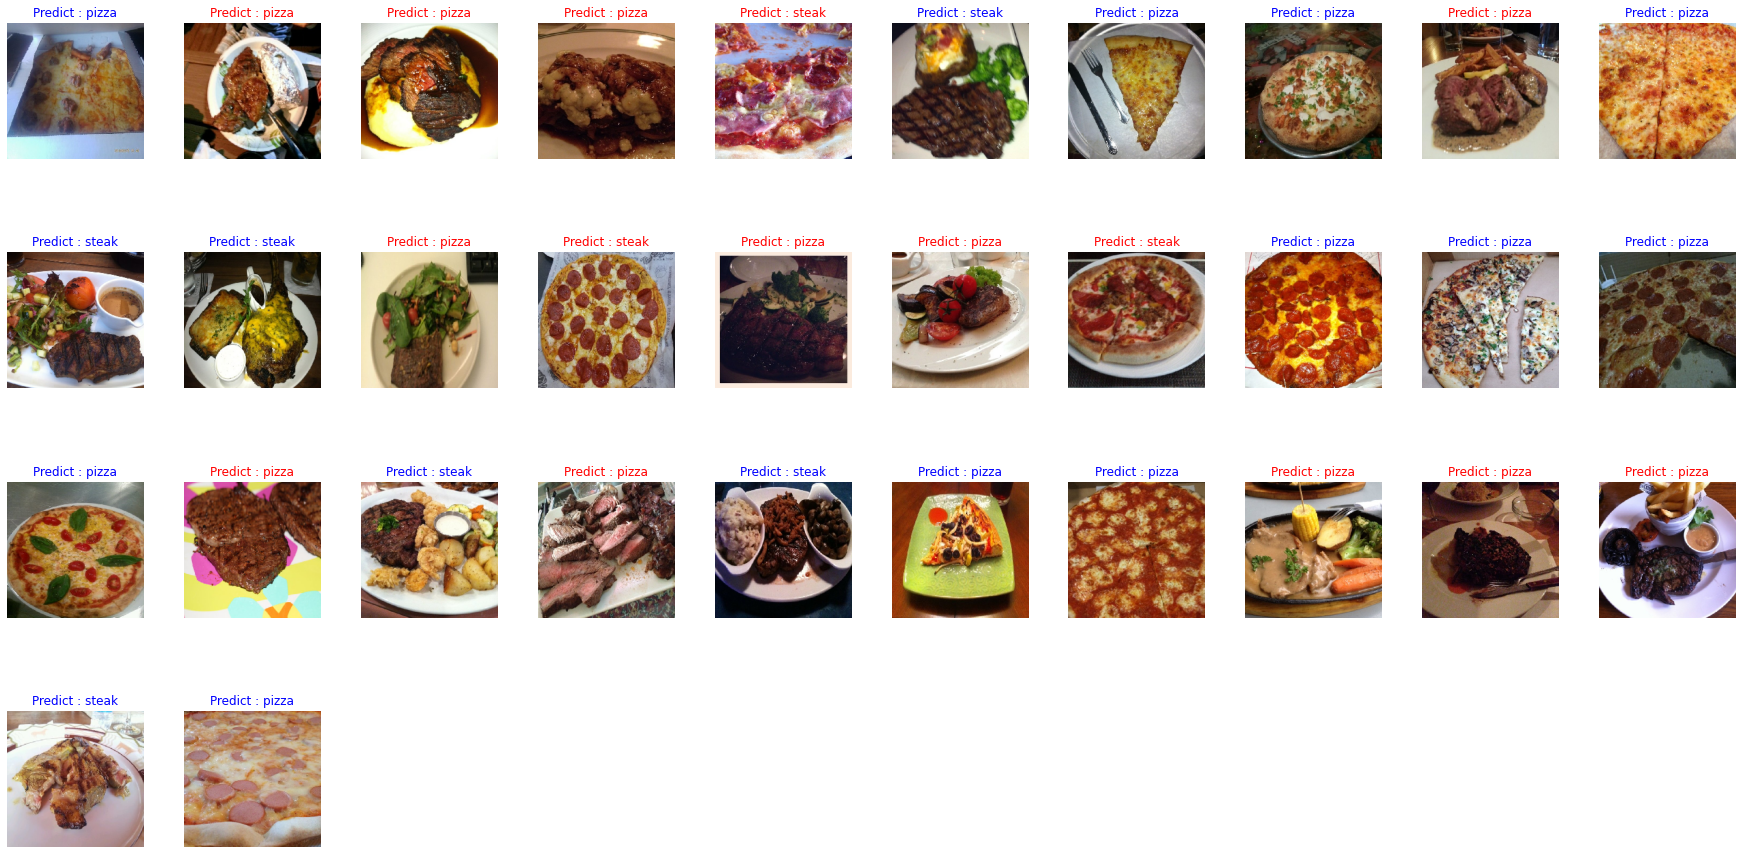

In [349]:
plt.figure(figsize=(30,15))
for i in range(images.shape[0]) :
    plt.subplot(4,10,i+1)
    plt.imshow(images[i,:,:,:])
    if class_name[predictions[i]] == class_name[int(labels[i])] :
        color = 'blue'
    else :
        color = 'red'
    plt.title(f'Predict : {class_name[predictions[i]]}', c=color)
    plt.axis('off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)

## With data Augmentation
Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset


<img src="https://qph.cf2.quoracdn.net/main-qimg-7565e09ecc4a93604b9c26c8c2a89bf9-pjlq" />

In [199]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=.2,shear_range=.2,
                                        zoom_range=.2,width_shift_range=.2,
                                        height_shift_range=.2,horizontal_flip=True)
train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                                        batch_size=32,
                                                        target_size=(224,224),
                                                        class_mode='binary',
                                                        shuffle=False) # for visuallize only but in real training must shuffle
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                shuffle=False) # for visuallize only

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [200]:
images, labels = train_data.next()
images_aug, labels_aug = train_data_aug.next()

In [201]:
len(images), len(images_aug), images[0].shape

(32, 32, (224, 224, 3))

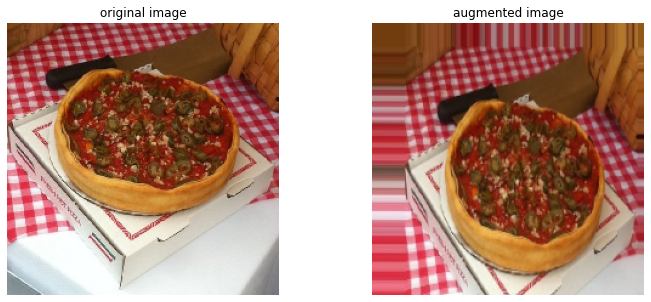

In [204]:
import random
random_number = random.randint(0,31) # 32 images in each batch

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(images[random_number])
plt.axis('off')

plt.subplot(1,2,2)
plt.title('augmented image')
plt.imshow(images_aug[random_number])
plt.axis('off');